[[ 4. -1. -1.  0.  0.  0.]
 [ 0.  4.  0. -1.  0.  0.]
 [-1.  0.  4. -1.  0.  0.]
 [ 0. -1.  0.  4.  0.  0.]
 [ 0.  0. -2.  0.  4. -1.]
 [ 0.  0.  0. -2. -1.  4.]]
[[120.]
 [120.]
 [100.]
 [100.]
 [100.]
 [100.]]
Convergence achieved in 37 iterations using BiCGStab.
[[51.28888889]
 [38.66666667]
 [46.48888889]
 [34.66666667]
 [62.74962963]
 [58.02074074]]
The resuling matrix is: 
[[ 20.         100.         100.         100.        ]
 [ 20.          38.66666667  34.66666667  58.02074074]
 [ 20.          51.28888889  46.48888889  62.74962963]
 [ 20.         100.         100.         100.        ]]


C:\Users\Jeryl Salas\AppData\Local\Temp\ipykernel_23448\2624425858.py:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[i, j+1] = x[k]


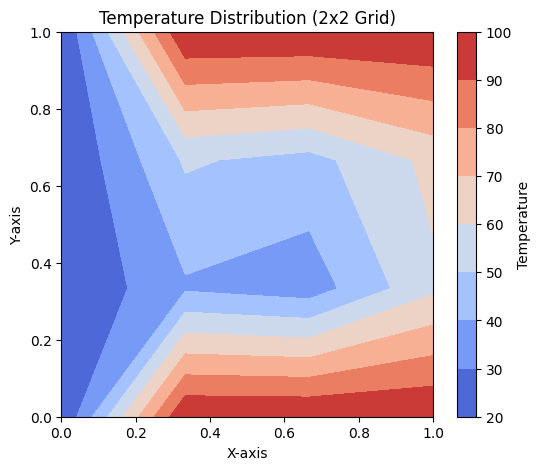

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

dx = L / N  # Grid spacing

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# Left side boundary condition (T = 20)
T[:, 0] = 20.0  

# Top and bottom side boundary conditions (T = 100)
T[0, :] = 100.0  
T[-1, :] = 100.0  
T[0, 0] = 20.0
T[-1, 0] = 20.0
for i in range(1, N):
    T[i, -1] = 1


A = np.zeros((6, 6))
b = np.zeros((6, 1))


def stencil_method(i, j, k):
    A[k, k] = 4

    n = 0

    if T[i-1, j] != 0:
        b[k, 0] += T[i-1, j]
    else:
        n += 1
        A[k, k+n] = -1 

    if T[i+1, j] != 0:
        b[k, 0] += T[i+1, j]
    else:
        n += 1
        A[k+n*-1, k] = -1 

    if T[i, j-1] != 0:
        b[k, 0] += T[i, j-1]
    else:
        n += 1
        A[k, k+n*-1] = -1


    if T[i, j+1] != 0:
        if T[i, j+1] != 1:
            b[k, 0] += T[i, j+1]
    else:
        n += 1
        A[k, k+n] = -1 
    
    return None

def neumann_boundary_stencil_method(i, j, k):
    A[k, k] = 4
    n = 0

    if T[i-1, j] != 1:
        b[k, 0] += T[i-1, j]
    else:
        n += 1
        A[k, k+n] = -1 

    if T[i+1, j] != 1:
        b[k, 0] += T[i+1, j]
    else:
        n += 1
        A[k, k+n*-1] = -1 

    if T[i, j-1] != 0:
        b[k, 0] += T[i, j-1]
    else:
        n += 1
        A[k, k+n*-1] += -2

    return None


k = 0
for j in range(N):
    for i in range(N-1, 0, -1):
        if k < N+1:
            stencil_method(i, j+1, k)
        else:
            neumann_boundary_stencil_method(i, j+1, k)
        k += 1


# Test BiCGStab method with your matrices
x_0 = np.ones_like(b)
print(A)
print(b)

def BiCGStab(A, B, x_0, max_iterations=10000, tolerance=1e-8):
    x = x_0
    r = B - np.dot(A, x)
    p = r
    r_tilde = r.copy()
    rsold = np.dot(r.T, r).item()

    for i in range(max_iterations):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(r_tilde.T, Ap).item()
        x = x + alpha * p
        r = r - alpha * Ap
        s = r.copy()

        rsnew = np.dot(r.T, r).item()
        if np.sqrt(rsnew) < tolerance:
            print(f"Convergence achieved in {i+1} iterations using BiCGStab.")
            return x
        
        beta = (rsnew / rsold) * (alpha / np.dot(r_tilde.T, s).item())
        r_tilde = r - beta * (r_tilde - np.dot(A, s))
        p = r_tilde + beta * p
        rsold = rsnew

    print("Maximum iterations reached without convergence.")
    return x

x = BiCGStab(A, b, x_0)
print(x)

k = 0
for j in range(N):
    for i in range(N-1, 0, -1):
        T[i, j+1] = x[k]
        k += 1

print("The resuling matrix is: ")
print(T)

# Visualize the temperature distribution
x = np.linspace(0, L, N+1)
y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, T, cmap='coolwarm')
plt.colorbar(label='Temperature')
plt.title('Temperature Distribution (2x2 Grid)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()




[[ 20. 100. 100. 100. 100. 100.]
 [ 20.   0.   0.   0.   0.   1.]
 [ 20.   0.   0.   0.   0.   1.]
 [ 20.   0.   0.   0.   0.   1.]
 [ 20.   0.   0.   0.   0.   1.]
 [ 20. 100. 100. 100. 100. 100.]]
[[ 4. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

C:\Users\Jeryl Salas\AppData\Local\Temp\ipykernel_23448\3952746134.py:136: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[i, j+1] = x[k]


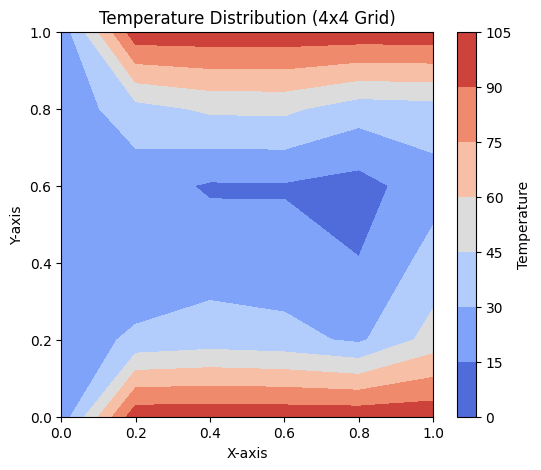

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 5  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

dx = L / N  # Grid spacing

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# boundary conditions
T[:, 0] = 20.0  
T[0, :] = 100.0  
T[-1, :] = 100.0  
T[0, 0] = 20.0
T[-1, 0] = 20.0
for i in range(1, N):
    T[i, -1] = 1

print(T)
np.set_printoptions(precision=3, suppress=True, linewidth=100)

A = np.zeros(((N-1)**2 + (N-1), (N-1)**2 + (N-1)))
b = np.zeros(((N-1)**2 + (N-1), 1))


def stencil_method(i, j, k):
    A[k, k] = 4

    n = 0

    if T[i-1, j] != 0:
        b[k, 0] += T[i-1, j]
    else:
        n += 1
        A[k, k+n] = -1 

    if T[i+1, j] != 0:
        b[k, 0] += T[i+1, j]
    else:
        n += 1
        A[k+n*-1, k] = -1 

    if T[i, j-1] != 0:
        b[k, 0] += T[i, j-1]
    else:
        n += 1
        A[k, k+n*-1] = -1


    if T[i, j+1] != 0:
        if T[i, j+1] != 1:
            b[k, 0] += T[i, j+1]
    else:
        n += 1
        A[k, k+n] = -1 
    
    return None

def neumann_boundary_stencil_method(i, j, k):
    A[k, k] = 4
    n = 0

    if T[i-1, j] != 1:
        b[k, 0] += T[i-1, j]
    else:
        n += 1
        A[k, k+n] = -1 

    if T[i+1, j] != 1:
        b[k, 0] += T[i+1, j]
    else:
        n += 1
        A[k, k+n*-1] = -1 

    if T[i, j-1] != 0:
        b[k, 0] += T[i, j-1]
    else:
        n += 1
        A[k, k+n*-1] += -2

    return None


k = 0
for j in range(N):
    for i in range(N-1, 0, -1):
        if k < (N-1)**2:
            stencil_method(i, j+1, k)
            print(A)
        else:
            neumann_boundary_stencil_method(i, j+1, k)
        k += 1


# Test BiCGStab method with your matrices
x_0 = np.ones_like(b)
print(A)
print(b)

def BICGSTAB(A, B, x_0, max_iterations=10000, tolerance=1e-8):
    x = x_0
    r = B - np.dot(A, x)
    p = r
    r_tilde = r.copy()
    rsold = np.dot(r.T, r).item()

    for i in range(max_iterations):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(r_tilde.T, Ap).item()
        x = x + alpha * p
        r = r - alpha * Ap
        s = r.copy()

        rsnew = np.dot(r.T, r).item()
        if np.sqrt(rsnew) < tolerance:
            print(f"Convergence achieved in {i+1} iterations using BiCGSTAB.")
            return x
        
        beta = (rsnew / rsold) * (alpha / np.dot(r_tilde.T, s).item())
        r_tilde = r - beta * (r_tilde - np.dot(A, s))
        p = r_tilde + beta * p
        rsold = rsnew

    print("Maximum iterations reached without convergence.")
    return x

x = BICGSTAB(A, b, x_0)
print(x)

k = 0
for j in range(N):
    for i in range(N-1, 0, -1):
        T[i, j+1] = x[k]
        k += 1


print("The resuling matrix is: ")
print(T)

# Visualize the temperature distribution
x = np.linspace(0, L, N+1)
y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, T, cmap='coolwarm')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution ({N-1}x{N-1} Grid)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()


